# LSTM Sentiment Analysis for Bussiness Performances Review

## Download and Import modules
This code snippet includes several import statements and libraries used for text preprocessing and preparing data for a machine learning model. It imports numpy and pandas for data manipulation, nltk and stopwords for text processing, Sastrawi for stemming, re and string for text cleaning, multiprocessing for parallel processing, csv for handling CSV files, tensorflow for building and training the machine learning model, sklearn for label encoding, and Tokenizer and pad_sequences from `tensorflow.keras.preprocessing.text` for tokenizing and padding sequences.



In [1]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
import string
import multiprocessing
import csv
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Load Files
This code snippet below mounts the Google Drive to the Colab notebook and copies two CSV files (olshop_negative.csv and olshop_positive.csv) from the specified paths in the Google Drive to the /content directory in the Colab environment. It utilizes the google.colab library for mounting the drive and the shutil library for file copying. The code ensures that the drive is forcefully remounted and performs the copy operation using a list comprehension.

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
import shutil

paths = ['/content/drive/MyDrive/Review/olshop_negative.csv', '/content/drive/MyDrive/Review/olshop_positive.csv']

[shutil.copy(i, '/content') for i in paths]

['/content/olshop_negative.csv', '/content/olshop_positive.csv']

## Define Preprocessing and File Parsing Function

These code below defines a text preprocessing function that takes a sentence as input and performs several preprocessing steps. It uses the Sastrawi library for stemming the words in the sentence, converts the sentence to lowercase, removes numbers, punctuation, and whitespace, and finally removes stopwords using a predefined set of Indonesian stopwords. The function returns the preprocessed sentence.

In [6]:
#Text preprocessing (reproducible)
stemmer = StemmerFactory().create_stemmer()
listStopword =  set(stopwords.words('indonesian'))

def text_preprocessing(sentence):
  
  #Stemming using Sastrawi
  sentence   = stemmer.stem(sentence)

  #lowering case
  sentence = sentence.lower()

  #remove number
  sentence = re.sub(r"\d+", "", sentence)

  #remove punctuation and whitespace
  sentence = sentence.translate(str.maketrans("","", string.punctuation))
  sentence = sentence.strip()

  #remove stopwords
  words = sentence.split()
  no_words = [w for w in words if w not in listStopword]
  sentence = " ".join(no_words)

  return sentence

These code snippets below defines a function for parsing a CSV file containing reviews. The function takes the file path and a sentiment value as input. It reads the CSV file, skips the header row, and iterates over the rows. If a row has a length different from the specified standardized length, it is skipped. The function extracts the sentence from the row, applies a text preprocessing function to the sentence, and appends it to a list of sentences. It also creates a list of labels based on the provided sentiment value. The function returns a list of tuples, where each tuple contains a preprocessed sentence and its corresponding label.

In [77]:
# Parse csv review
def parse_csv(filePath, sentiment):
  sentences = []

  with open(filePath, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='|')
    next(reader)  # Skip the header row if present
    
    standardized_length = 4  # Specify the desired length of rows

    for row in reader:
      if len(row) != standardized_length:
        continue  # Skip rows with non-standardized length
      sentence = row[2]
      sentence = text_preprocessing(sentence)  # Apply text preprocessing function

      if sentence.strip() == "":
        continue

      sentences.append(sentence)
  labels = [sentiment] * len(sentences)
  return list(zip(sentences, labels))

## Parse and Process Negative Review

In [78]:
#Lets parse negative review
neg_dataset = parse_csv('/content/olshop_negative.csv', sentiment='negative')

In [79]:
print(f"There are {len(neg_dataset)} sentences in the dataset.\n")
print("First sentence:\n{}\n".format(neg_dataset[0][0]))
print(f"First sentence has {len(neg_dataset[0][0].split())} words (after removing stopwords).\n")
print(f"There are {len([label for _, label in neg_dataset])} labels in the dataset.\n")
print("The first 5 labels are:{}".format([label for _, label in neg_dataset[:5]]))

There are 1934 sentences in the dataset.

First sentence:
belanja bhineka ogah ogah dasar review bhineka point ya iklan adsense cuman berani bayar perak login langsung blokir iklan adsense bhineka curcol bentar toko harga situ sungguh kecewa update alias harga beda saing toko merchan ragu dengar komentar transaksi bhineka ribet bhineka aja ribet pa merchan host bhineka ribet kuadrat moga bhineka bangkit saing toko toko online malu ah web doang kualitas cetek ngak beli ni bhineka toko halaman web kalah enterkomputer rakit nonokomputer

First sentence has 74 words (after removing stopwords).

There are 1934 labels in the dataset.

The first 5 labels are:['negative', 'negative', 'negative', 'negative', 'negative']


In [80]:
import pandas as pd

df_neg = pd.DataFrame(neg_dataset, columns=['Sentence', 'Label'])
df_neg

,Sentence,Label
0,belanja bhineka ogah ogah dasar review bhineka...,negative
1,transfer proses ket diweb barang ready stock g...,negative
2,buah kesan buruk belanja bhinneka,negative
3,kirang penuh selera online shopper,negative
4,beli barang kirim jkt aja bth utk proses br st...,negative
...,...,...
1929,layan kecewa,negative
1930,potong harga kalo indomaret dpt potong ribu,negative
1931,kecewa krn sewa mobil helpdesk sulit hubung mo...,negative
1932,mesan tulus check in tgl nyata tunggu jam wib ...,negative


## Parse and Process Positive Review

In [81]:
pos_dataset = parse_csv('/content/olshop_positive.csv', sentiment='positive')

In [82]:
print(f"There are {len(pos_dataset)} sentences in the dataset.\n")
print("First sentence:\n{}\n".format(pos_dataset[0][0]))
print(f"First sentence has {len(pos_dataset[0][0].split())} words (after removing stopwords).\n")
print(f"There are {len([label for _, label in pos_dataset])} labels in the dataset.\n")
print("The first 5 labels are:{}".format([label for _, label in pos_dataset[:5]]))

There are 10047 sentences in the dataset.

First sentence:
moga bhinneka com adain kuis kalo survey hadiah biar gampang menang

First sentence has 11 words (after removing stopwords).

There are 10047 labels in the dataset.

The first 5 labels are:['positive', 'positive', 'positive', 'positive', 'positive']


In [83]:
df_pos = pd.DataFrame(pos_dataset, columns=['Sentence', 'Label'])
df_pos

,Sentence,Label
0,moga bhinneka com adain kuis kalo survey hadia...,positive
1,ga nunggu,positive
2,hood,positive
3,kirim cepat barang lengkap tampil website mudah,positive
4,coba,positive
...,...,...
10042,alam ulang kali kali harga sesuai layan muas,positive
10043,tiket com upaya layan langgan pelauanan yag pr...,positive
10044,harga layan tiket muas layan support agen rama...,positive
10045,mohon promo nya ya tiket makasih,positive


In [84]:
import random

random.shuffle(pos_dataset)

## Unite and Shuffle The Aggregated Dataset

In [85]:
BUFFER_SIZE = 15000

agg_dataset = tf.data.Dataset.from_tensor_slices(neg_dataset + pos_dataset[:len(neg_dataset)])

# Shuffle the dataset
agg_dataset = agg_dataset.shuffle(BUFFER_SIZE)

# Prefetch the data
agg_dataset = agg_dataset.prefetch(1)

In [86]:
print(len(agg_dataset))

3868


In [87]:
df_agg = pd.DataFrame(list(agg_dataset.as_numpy_iterator()), columns=['Sentence', 'Label'])

df_agg['Sentence'] = df_agg['Sentence'].str.decode('utf-8')
df_agg['Label'] = df_agg['Label'].str.decode('utf-8')

df_agg

,Sentence,Label
0,was was belanja online dizalora was was henti ...,positive
1,cari lokasi ribet tampil ya jg bikin sakit mata,negative
2,the prices here is very competitive,positive
3,bayar atm sedia sms banking bank bank bumn bni...,negative
4,transaksi online kecewa pesan barang tgl smpe ...,negative
...,...,...
3863,yg butuh coba kl bs bayar ok,positive
3864,bantu nyari barang yg kalo bebas ongkir nih he...,positive
3865,tanggal laku beli nila rp kendala jaring inter...,negative
3866,sistem qa tipu liar,negative


In [88]:
file_path = '/content/drive/MyDrive/Review/dataset_clean_ver2.csv'
df_agg.to_csv(file_path, index=False)

## Split The Dataset into Training and Validation

In [89]:
def split_train_val(dataset, train_split):
  
  # Unzip the dataset into sentences and labels
  all_sentences, all_labels = zip(*dataset)

  # Convert EagerTensor objects to regular Python lists
  all_sentences = [str(sentence.numpy(), 'utf-8') for sentence in all_sentences]
  all_labels = [str(label.numpy(), 'utf-8') for label in all_labels]

  # Encode labels
  encoder = LabelEncoder()
  all_labels = encoder.fit_transform(all_labels)

  split = int(len(all_sentences)*train_split)

  train_sentences = all_sentences[:split]
  train_labels = all_labels[:split]

  val_sentences = all_sentences[split:]
  val_labels = all_labels[split:]

  return train_sentences, val_sentences, train_labels, val_labels

In [90]:
TRAINING_SPLIT = 0.8
train_sentences, val_sentences, train_labels, val_labels = split_train_val(agg_dataset, train_split=TRAINING_SPLIT)

In [91]:
print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_sentences)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.{val_labels[:5]}")

There are 3094 sentences for training.

There are 3094 labels for training.

There are 774 sentences for validation.

There are 774 labels for validation.[1 0 0 1 1]


## Tokenization and Sequencing

In [92]:
NUM_WORDS = 10000
EMBEDDING_DIM = 16
MAXLEN = 1500
PADDING = 'post'
TRUNCATING = 'post'
OOV_TOKEN = "<OOV>"

In [93]:
def tokenizer_(sentences, num_words, oov_token):
    # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
    tokenizer = Tokenizer(num_words = num_words, oov_token=oov_token)
    
    # Fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(train_sentences)

    return tokenizer


In [104]:
tokenizer = tokenizer_(train_sentences, NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 7790 words

<OOV> token included in vocabulary


In [95]:
def seq_and_pad(sentences, tokenizer, padding, truncating, maxlen):
    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)
    
    # Pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences, padding=padding, truncating=truncating, maxlen=maxlen)
    
    return padded_sequences

In [96]:
padded_train = seq_and_pad(train_sentences, tokenizer, PADDING, TRUNCATING, MAXLEN)
padded_val = seq_and_pad(val_sentences, tokenizer, PADDING, TRUNCATING, MAXLEN)

print(f"Padded training sequences have shape: {padded_train.shape}\n")
print(f"Padded validation sequences have shape: {padded_val.shape}")

Padded training sequences have shape: (3094, 1500)

Padded validation sequences have shape: (774, 1500)


## Create Callbacks

In [97]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.900):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

## Create LSTM Model

In [98]:
def create_model(vocab_size, embedding_dim, maxlen):
    model = tf.keras.Sequential([ 
        tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=maxlen), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    accuracy = tf.keras.metrics.BinaryAccuracy(name='accuracy')
    precision = tf.keras.metrics.Precision(name='precision')

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=[accuracy, precision]) 
    
    return model

In [99]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1500, 16)          160016    
                                                                 
 dropout_12 (Dropout)        (None, 1500, 16)          0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 300)              200400    
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 64)                19264     
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                      

## Training the Model
For evaluation consideration, i just set the epoch maximum in 10.

In [100]:
model = create_model(NUM_WORDS, EMBEDDING_DIM, MAXLEN)

history = model.fit(padded_train, 
                    train_labels, 
                    epochs=10, 
                    validation_data=(padded_val, val_labels),
                    verbose=1)
                    #callbacks=myCallback())

Epoch 1/10
97/97 [==============================] - 574s 6s/step - loss: 0.6085 - accuracy: 0.6849 - precision: 0.6604 - val_loss: 0.4768 - val_accuracy: 0.8023 - val_precision: 0.7721
Epoch 2/10
97/97 [==============================] - 566s 6s/step - loss: 0.3991 - accuracy: 0.8352 - precision: 0.8181 - val_loss: 0.3526 - val_accuracy: 0.8630 - val_precision: 0.8690
Epoch 3/10
97/97 [==============================] - 554s 6s/step - loss: 0.2970 - accuracy: 0.8833 - precision: 0.8857 - val_loss: 0.3345 - val_accuracy: 0.8708 - val_precision: 0.8843
Epoch 4/10
97/97 [==============================] - 554s 6s/step - loss: 0.2472 - accuracy: 0.9053 - precision: 0.9157 - val_loss: 0.6617 - val_accuracy: 0.7313 - val_precision: 0.9704
Epoch 5/10
97/97 [==============================] - 552s 6s/step - loss: 0.2219 - accuracy: 0.9160 - precision: 0.9357 - val_loss: 0.3192 - val_accuracy: 0.8798 - val_precision: 0.9026
Epoch 6/10
97/97 [==============================] - 562s 6s/step - loss: 0.

## Model Evaluation

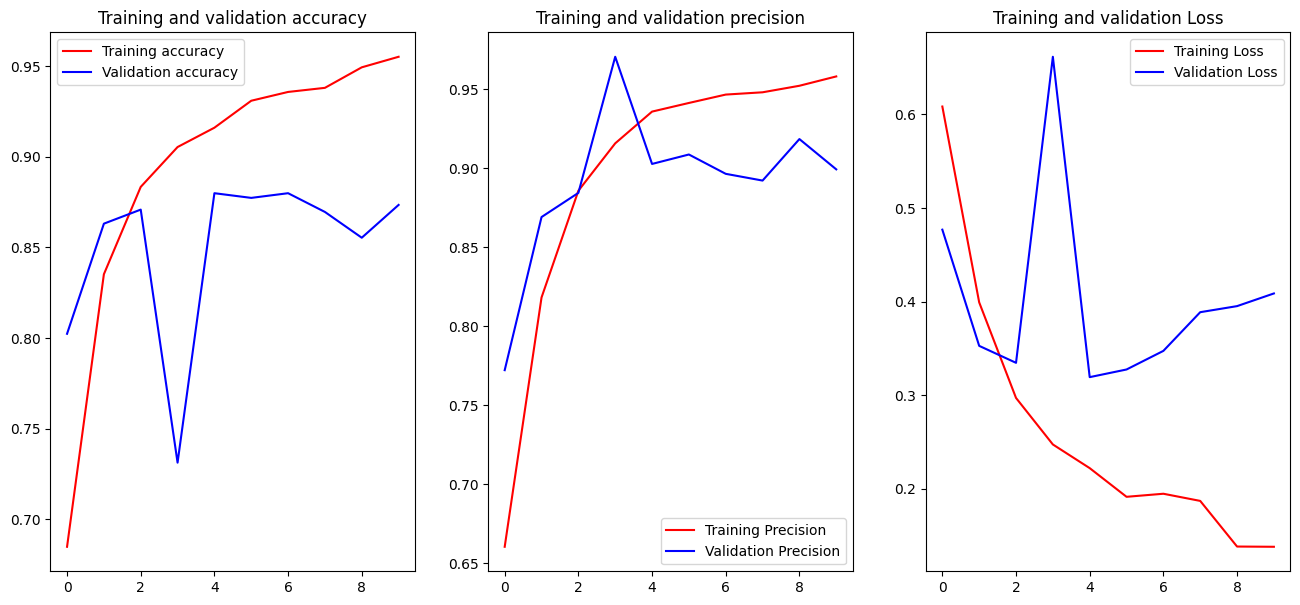

In [101]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
precision = history.history['precision']
val_precision = history.history['val_precision']

epochs = range(len(acc))

# Create a subplot with two plots stacked vertically
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 7))

# Plot the first plot on the left
ax1.plot(epochs, acc, 'r', label='Training accuracy')
ax1.plot(epochs, val_acc, 'b', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.legend(loc=0)

# Plot the second plot 
ax2.plot(epochs, precision, 'r', label='Training Precision')
ax2.plot(epochs, val_precision, 'b', label='Validation Precision')
ax2.set_title('Training and validation precision')
ax2.legend(loc=0)

# Plot the third plot on the right
ax3.plot(epochs, loss, 'r', label='Training Loss')
ax3.plot(epochs, val_loss, 'b', label='Validation Loss')
ax3.set_title('Training and validation Loss')
ax3.legend(loc=0)

# Show the plot
plt.show()

## Testing

In [106]:
text_test = ['Tidak bisa dipercaya, sangat menyesal belanja di Bhinneka.com. Barangnya tidak ori jadi gampang rusak',
             'Kualitasnya sesuai prediksi sih, meskipun pengiriman agak telat',
             'puas belanja di sini meskipun sellernya agak nyolot dikit',
             'penutupnya sudah lepas bahkan saat pertama kali digunakan. tidak professional sekali saat diprotes tidak dapat diretur',
             'kapok belanja, bahannya panas dan tipis',
             'warna sesuai dengan katalog, deskripsi bahan sesuai, hanya sepertinya harganya lebih tinggi dari toko sebelah',
             'yaampun udah nyampe baru nyadar belanja ga pake ongkir & promo huhu. tapi gapapa lumayan lah ya kualitas sesuai harga',
             'barang reject masih aja dikirim, apa ga diliat sebelum dikemas?']

clean_text = []
score = []
result = []

for test in text_test:
  test = [text_preprocessing(test)]
  padded_test = seq_and_pad(test, tokenizer, PADDING, TRUNCATING, MAXLEN)
  clean_text.append(test)

  test_result = model.predict(padded_test)
  score.append(test_result[0][0])
  test_result = "negative" if test_result[0][0] < 0.5 else 'positive'
  result.append(test_result)

df_test = pd.DataFrame({'Clean Text': clean_text, 'Score': score, 'Result': result})
df_test

1/1 [==============================] - 0s 199ms/step


,Clean Text,Score,Result
0,[percaya sesal belanja bhinneka com barang ori...,0.435665,negative
1,[kualitas sesuai prediksi sih kirim telat],0.918318,positive
2,[puas belanja sellernya nyolot dikit],0.997611,positive
3,[tutup lepas kali professional protes retur],0.027750,negative
4,[kapok belanja bahan panas tipis],0.015423,negative
5,[warna sesuai katalog deskripsi bahan sesuai h...,0.867591,positive
6,[yaampun udah nyampe nyadar belanja ga pake on...,0.966092,positive
7,[barang reject aja kirim ga liat kemas],0.070696,negative


## Save the model

In [103]:
saved_model_path = "./content/LSTM-sentiment-model-ver2.h5"

model.save(saved_model_path)

dest_path = '/content/drive/MyDrive/Review'
shutil.copyfile(saved_model_path, dest_path + '/LSTM-sentiment-model-ver2.h5')


'/content/drive/MyDrive/Review/LSTM-sentiment-model-ver2.h5'

## Run JSON Converter

In [108]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [110]:
!tensorflowjs_converter --input_format=keras{saved_model_path} ./

2023-05-30 15:43:19.641630: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: TensorFlow.js model converters.
       [-h]
       [--input_format {tf_frozen_model,tfjs_layers_model,keras,keras_saved_model,tf_saved_model,tf_hub}]
       [--output_format {keras,keras_saved_model,tfjs_graph_model,tfjs_layers_model}]
       [--signature_name SIGNATURE_NAME]
       [--saved_model_tags SAVED_MODEL_TAGS]
       [--quantize_float16 [QUANTIZE_FLOAT16]]
       [--quantize_uint8 [QUANTIZE_UINT8]]
       [--quantize_uint16 [QUANTIZE_UINT16]]
       [--quantization_bytes {1,2}]
       [--split_weights_by_layer]
       [--version]
       [--skip_op_check]
       [--strip_debug_ops STRIP_DEBUG_OPS]
       [--use_structured_outputs_names USE_STRUCTURED_OUTPUTS_NAMES]
       [--weight_shard_size_bytes WEIGHT_SHARD_SIZE_BYTES]
       [--output_node_names OUTPUT_NODE_NAMES]
       [--control_flow_v2 CONTROL_FLOW_V2]
       [--experiments EXPERIMENTS]
  

In [111]:
shutil.copyfile('/content/group1-shard1of1.bin', dest_path + '/group1-shard1of1.bin')
shutil.copyfile('/content/model.json', dest_path + '/model.json')

'/content/drive/MyDrive/Review/model.json'

## Covert to TFLite

In [ ]:
import pathlib
export_dir = './content/saved_model/'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimizations
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Set supported ops to include SELECT_TF_OPS
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

# Disable lowering tensor list ops
converter._experimental_lower_tensor_list_ops = False

# Invoke the converter to generate the TFLite model
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)


568248